In [1]:
# Run this block first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Heat transfer

## Exercise 1: single room heat balance

The walls of a room are made of:
* 44 m$^2$ of concrete wall ($e_c=15$ cm, $\lambda_c=2,3$ W/(m.K)) with an insulation layer ($e_{i}=10$ cm, $\lambda_{i}=0.04$ W/(m.K))
* 8 m$^2$ of double glazing ($U_v=3.3$ W/(m$^2$.K))
* The indoor heat transfer coefficient is $h_i = 0.11$ (m$^2$.K)/W, the outdoor one is $h_e = 0.07$ (m$^2$.K)/W

The room is ventilated with an air change rate of 9 m$^3$/h.

Calculate the heating power that should be prescribed to maintain an indoor temperature of 19°C, if the outdoor temperature is 2°C.

### Solution

In [2]:
# Concrete wall
e_c = 0.15
e_i = 0.10
lambda_c = 2.3
lambda_i = 0.04
A_wall = 44

# Glazing
U_v = 3.3
A_v = 8

# Surface heat transfer coefficients
Ri = 0.11
Re = 0.07

# Ventilation rate (m3/h)
ventilation = 9

# Temperatures
ti = 19
te = 2

# Heat transfer coefficients
D_wall = 1 / ( Ri + Re + e_c/lambda_c + e_i/lambda_i ) * A_wall
D_window = U_v * A_v
D_ventilation = ventilation * 1000/3600

# Total heat loss coefficient and heating power
D_global = D_wall + D_window + D_ventilation
P_heating = D_global * (ti-te)

# In order to display the value of a variable:
print("Heating power: ", P_heating)

Heating power:  763.7738675958187


## Exercise 2: heat balance of two rooms

<img src="figures/heat_ex2.png" alt="ex2" width="500"/>

1. Write one energy balance equation for each room.
2. If the outdoor temperature is 9°C and the heating power is 1000 W, solve the system for the temperatures of room 1 and 2
3. If the outdoor temperature is 9°C and the temperature of room 1 is 19°C, solve the system for the heating power of room 1 and the temperature of room 2.

### Solution

The energy balance of each room is written here in the direction ''the sum of all heat leaving the room equals zero'':

$$ (A_{wall1} U_{wall}+A_{win}U_{win}) (T_1 - T_e) + A_p U_p (T_1 - T_2) + \dot{m} c_p (T_1 - T_e) = \Phi$$

$$ A_p U_p (T_2 - T_1) + \dot{m} c_p (T_2 - T_1) + A_{wall2} U_{wall} (T_2 - T_e) = 0$$

This system can be written in matrix form and solved by linear algebra.

\begin{equation}
\begin{pmatrix} A_{wall1} U_{wall}+A_{win}U_{win} + A_p U_p + \dot{m} c_p & -A_p U_p \\ - A_p U_p -\dot{m} c_p & A_{wall2} U_{wall} + A_p U_p + \dot{m} c_p \end{pmatrix} \begin{pmatrix} T_1 \\ T_2 \end{pmatrix} = \begin{pmatrix} \left(A_{wall1} U_{wall}+A_{win}U_{win} + \dot{m} c_p\right)T_e + \Phi \\ A_{wall2} U_{wall} T_e\end{pmatrix}
\end{equation}

In [12]:
# External wall
Awall1 = 31.2
Awall2 = 15.6
Uwall = 0.45
# Window
Awin = 2
Uwin = 2.9
# Partition wall
Ap = 12
Up = 0.7  # use this value instead of 11
# Ventilation rate
rho = 1.2
mdot = 0.1 * 48 * rho / 3600 # kg/s # air change rate of 0.1 vol/h instead of 1
cp = 1000

# Solar heat gain
I = 600
ga = 0.42

Te = 9
Phi = 300

# Defining the matrices of the linear system
# An "array", defined as follows, can be a vector or a matrix
A = np.array([[Awall1*Uwall + Awin*Uwin + Ap*Up + mdot*cp, -Ap*Up],
              [-Ap*Up-mdot*cp, Awall2*Uwall + Ap*Up + mdot*cp]])
b = np.array([Te*(Awall1*Uwall+Awin*Uwin+mdot*cp)+Phi+ga*I*Awin, Awall2*Uwall*Te])

y = np.linalg.solve(A,b)

print("Temperatures: ", y)

Temperatures:  [41.28315397 27.96777554]


## Exercise 3: greenhouse

<img src="figures/heat_ex3.png" alt="ex3" width="250"/>

A greenhouse is represented by a half-sphere. We are supposing the following hypotheses:
* The greenhouse has a diameter of 6 m.
* The outdoor temperature $T_e$ is 24°C and the horizontal solar irradiance $E_\mathit{sol}$ is 400 W/m$^2$.
* The glass cover has a temperature $T_c$. It has a transmission coefficient of $\tau_d = 0.8$ for the sunlight, and an emissivity of $\varepsilon=0.95$ for the infrared radiation. The thermal resistance of the glass is very low and can be neglected.
* The convective surface transfer coefficients are: $h_{g}=2.6$ W/(m$^2$.K) between the ground and the indoor air; $h_{ci}=6.1$ W/(m$^2$.K) between the cover and the indoor air; $h_{ce}=16$ W/(m$^2$.K) between the cover and the outside.
* The ground has an emissivity of 0.9. It is considered adiabatic: there is no heat loss towards the ground.

### Questions:
1. Calculate the view factor $F_{cg}$ between the glass cover and the ground. Using the simplified formulas from the lecture, write the expression of the radiant heat transfer coefficient $h_r$ between the cover and the ground.

In [4]:
# Weather data
Te = 273 + 24
E = 400

# Optical data
tau = 0.8
eps = 0.95
sigma = 5.67e-8

# Areas and view factors
r = 3                  # radius of the greenhouse
Ag = np.pi * r**2      # ground area
Ac = 2 * np.pi * r**2  # cover area
Fgc = 1                # view factor from ground to cover
Phi_g = Ag * E*tau*eps   # solar heat received by the ground

# Convection transfer coefficients
hg = 2.6
hci = 6.1
hce = 16

# initialisation: we need to assume the values of Tc and Tg to estimate the radiation transfer coefficient
Tc0 = 273 + 50
Tg0 = 273 + 60
hr = eps * Fgc * sigma * (Tc0**2+Tg0**2) * (Tc0+Tg0)

2. Draw the diagram of thermal resistances between each temperature point: $T_e$, $T_c$, $T_i$ and $T_g$.
3. Write the system of 3 equations for the unknown variables: $T_i$, $T_g$ and $T_c$.
4. Solve the system to calculate the three temperatures. You may need to assume the value of $h_r$.

The balance equations for each of the three unknown temperatures (indoor, ground and cover) read:

\begin{align}
A_c h_{ci}(T_i-T_c) + A_g h_{g}(T_i-T_g) & = 0 \\
A_g h_{g} (T_g-T_i) + A_g h_r (T_g-T_c) & = \Phi_g \\
A_c h_{ci}(T_c-T_i) + A_g h_r (T_c-T_g) + A_c h_{ce} (T_c-T_e) & = 0
\end{align}

This system can be written in matrix form:
\begin{equation}
\begin{pmatrix}A_c h_{ci}+A_g h_{g} & - A_g h_{g} & -A_c h_{ci} \\ -A_g h_{cg} & A_g h_{cg}+A_g h_r & - A_g h_r \\ -A_c h_{ci} & -A_g h_r & A_c h_{ci}+A_g h_r+A_c h_{ce}  \end{pmatrix} \begin{pmatrix} T_i \\ T_g \\ T_c \end{pmatrix} = \begin{pmatrix} 0 \\ \Phi_g \\ A_c h_{ce} T_e \end{pmatrix}
\end{equation}

In [5]:
A = np.array([[hg*Ag + hci*Ac, -hg*Ag, -hci*Ac],
              [-hg*Ag, hg*Ag+hr*Ag, -hr*Ag],
              [-hci*Ac, -hr*Ag, hce*Ac+hci*Ac+hr*Ag]])
b = np.array([0,
              Phi_g,
              hce*Ac*Te])

T = np.linalg.solve(A, b)

print("Temperatures (indoor, ground and cover): ", T-273.15)

Temperatures (indoor, ground and cover):  [38.82856422 64.53567324 33.35      ]


## Exercise 4: radiator

<img src="figures/heat_ex4.png" alt="ex3" width="250"/>

Consider the room shown above:
* The wall $S_5$ (on the left) is a window with a temperature of $T_5 = 8$°C.
* The surface $S_0$ is a radiator covering half the height of the wall on the right. Its temperature is $T_0 = 60$°C.
* The surface $S_2$ (the ground) is adiabatic.
* All other surfaces have a temperature of $T = 20$°C.

Calculate the radiative heat loss through the window, the net heat flux given by the radiator and the temperature of the ground. The emission coefficient of all surfaces is $\varepsilon=0.85$ and the reflexion is $\rho=1-\varepsilon$.

Calculate an approximation of the mean radiant temperature and the operative temperature in the middle of the room.

We suppose that the following view factors are known:

$$ F_{25}=0.1174 \: ; \: F_{20}=0.081 \: ; \: F_{50}= 0.0477$$

### Solution

All the walls that have a temperature of $T = 20°C$ can be considered as a single surface labelled ''3''. The question is therefore equivalent to heat exchange balance between 4 surfaces: we need to write 4 equations.

First, the view factors are required. Starting from the ones already given, all other view factors can be calculated from the simple formulas: $S_iF_{ij}=S_jF_{ji}$ and $\sum_j F_{ij}=1$.

We then need to write one equation for each surface. Surface 0 (the radiator) has a known temperature, which means:

$$J_0 =\varepsilon_0 \sigma T_0^4 + \rho_i\sum_{j=1}^n J_j F_{0j}$$

Surface 2 (the floor) has a known heat flux of zero since it is adiabatic:

$$0 = J_2 - \sum_{j=1}^n J_j F_{2j}$$

Surfaces 3 and 5 have the same kind of boundary condition as surface 2 (prescribed temperature): their equations are therefore similar. We end up with the following linear system of equations for the radiosities:

$$\begin{bmatrix} 1-\rho_0F_{00} & -\rho_0F_{02} & -\rho_0F_{03} & -\rho_0F_{05} \\ -F_{20} & 1-F_{22} & -F_{23} & -F_{25}  \\
-\rho_3F_{30} & -\rho_3F_{32} & 1-\rho_3F_{33} & -\rho_3F_{35} \\ -\rho_5F_{50} & -\rho_5F_{52} & - \rho_5F_{53} & 1-\rho_5F_{55}
\end{bmatrix}
\begin{bmatrix} J_0 \\ J_2 \\ J_3 \\ J_5 \end{bmatrix} =
\begin{bmatrix} \varepsilon_0\sigma T_0^4 \\ 0 \\ \varepsilon_3\sigma T_3^4 \\ \varepsilon_5\sigma T_5^4 \end{bmatrix}
$$

In [6]:
# Common properties
epsilon = 0.85
rho = 0.15
sigma = 5.67e-8

# Temperatures
T0 = 60+273.15
T3 = 20+273.15
T5 = 8+273.15

# Areas
A0 = 3 * 1
A2 = 3 * 4
A5 = 2 * 3
A3 = 2*(2*4) + 3*1 + 3*4

# View factors
F25 = 0.1174
F20 = 0.081
F50 = 0.0477
F00 = 0
F02 = F20 * A2/A0
F05 = F50 * A5/A0
F03 = 1 - F00 - F02 - F05
F22 = 0
F23 = 1 - F20 - F22 - F25
F52 = F25 * A2/A5
F55 = 0
F53 = 1 - F50 - F52 - F55
F30 = F03 * A0/A3
F32 = F23 * A2/A3
F35 = F53 * A5/A3
F33 = 1 - F30 - F35 - F32

# System matrices
A = np.array([[1-rho*F00, -rho*F02, -rho*F03, -rho*F05],
              [-F20, 1-F22, -F23, -F25],
              [-rho*F30, -rho*F32, 1-rho*F33, -rho*F35],
              [-rho*F50, -rho*F52, -rho*F53, 1-rho*F55]])
b = epsilon * sigma * np.array([T0**4, 0, T3**4, T5**4])

Solving this system results in the following values in W/m$^2$ for the radiosities:

In [7]:
J = np.linalg.solve(A, b)
print(J)

[656.60654455 433.22846091 420.45318261 366.33781622]


$$ J_0 = 656.61 \: ; \: J_2 = 433.23 \: ; \: J_3 = 420.45 \: ; \: J_5 = 366.34 $$

The last step is to use this formula:

$$\frac{\Phi_i}{S_i} = \frac{\varepsilon_i}{1-\varepsilon_i}(\sigma T_i^4-J_i) $$

in order to find the target values of the exercise: floor temperature $T_2$, radiator heat flux $\Phi_0$ and net heat flux on the window $\Phi_5$:

In [8]:
Phi0 = A0 * epsilon / rho * (sigma*T0**4-J[0])
T2 = (J[1]/sigma)**(1/4)
Phi5 = A5 * epsilon / rho * (sigma*T5**4-J[3])
print("Phi0 = ",Phi0)
print("T2 = ",T2-273.15)
print("Phi5 = ",Phi5)

Phi0 =  711.530333175192
T2 =  22.50381016686191
Phi5 =  -410.27710259064247


## Exercise 5: thermal inertia

<img src="figures/heat_ex5a.png" alt="ex5a" width="250"/>

We represent a building with a single thermal resistance $R$ (from the global heat transfer coefficient) and a single heat capacitance $C$. A heating power $\Phi$ is imposed on the indoor temperature. The evolution of the indoor temperature is thus driven by the differential equation:
\begin{equation}
C \frac{\partial T_i}{\partial t} = \frac{1}{R} \left(T_e-T_i\right) + \Phi
\end{equation}

### Question 1: winter conditions

We suppose that the building is initially at the same temperature $T_e$ as the outside. The heating is then turned on at a constant power $\Phi$.
1. Solve the equation above to show that the evolution of the indoor temperature is:
\begin{equation}
T_i = T_e + R \, \Phi \left(1-\mathrm{exp}\left(-\frac{t}{RC}\right)\right)
\end{equation}
2. Draw the evolution of $T_i$. How does this graph change with different values of $R$ and $C$?

### Solution

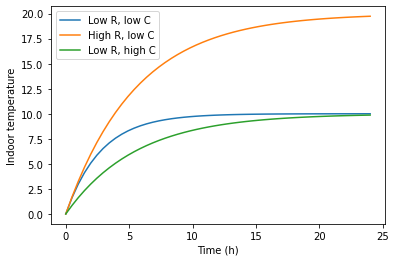

In [9]:
# Suppose an outdoor temperature 0°C and heating power 1000 W
Te = 0
Phi = 1000
t = np.linspace(0, 86400) # 24 heures

# L'équation de la température intérieure
def T(R, C):
  return Te + R*Phi*(1-np.exp(-t/R/C))

# Tracer un graphe
plt.figure()
plt.plot(t/3600, T(0.01, 1e6), label="Low R, low C")
plt.plot(t/3600, T(0.02, 1e6), label="High R, low C")
plt.plot(t/3600, T(0.01, 2e6), label="Low R, high C")
plt.xlabel("Time (h)")
plt.ylabel("Indoor temperature")
plt.legend()

### Question 2: summer conditions

<img src="figures/heat_ex5b.png" alt="ex5b" width="250"/>

We now suppose that the outdoor temperature is a sine wave (see Fig. \ref{fig:inertia2}). There is no heating: $\Phi=0$. The outdoor temperature varies between 10°C and 30°C, with a period of 24h.
\begin{align}
T_e & = 20 + 10 \, \mathrm{sin}(\omega \, t) \\
\omega & = \frac{2 \pi}{24 \times 3600}
\end{align}
We can show that the complex impedance of the building is:
\begin{equation}
Z(j\omega) = \frac{T_i}{T_e} = \frac{1}{1+jRC\omega}
\end{equation}
Draw the evolution of $T_i$. How does this graph change with different values of $R$ and $C$?

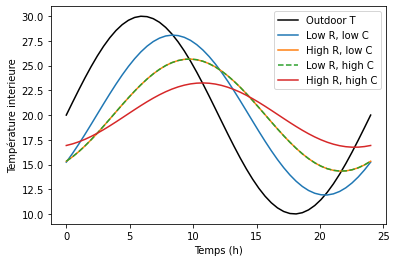

In [10]:
t = np.linspace(0, 86400) # 24 heures
omega = 2*np.pi / 24 / 3600
Te = 20 + 10 * np.sin(omega*t)

# L'équation de la température intérieure
def T(R, C):
  A = 10 / np.sqrt(1+(R*C*omega)**2)
  psi = -np.arctan(R*C*omega)
  return 20 + A * np.sin(omega*t + psi)

# Tracer un graphe
plt.figure()
plt.plot(t/3600, Te, '-k', label="Outdoor T")
plt.plot(t/3600, T(0.01, 1e6), label="Low R, low C")
plt.plot(t/3600, T(0.02, 1e6), label="High R, low C")
plt.plot(t/3600, T(0.01, 2e6), label="Low R, high C", linestyle='--')
plt.plot(t/3600, T(0.02, 2e6), label="High R, high C")
plt.xlabel("Temps (h)")
plt.ylabel("Température interieure")
plt.legend()